In [1]:
# Importing Library needed

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Using dataset from SeaBorn

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Simple EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
# Check numerical features statistical description
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Check numerical features correlation
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Correlation Price with Carat is postive and High, that means when diamond have higher carat, the price will go higher

Also note that x,y,z have postive relation with price and carat

We will not gonna use x, y ,z as features because most likely they are affects the carat value,

since they have high correlation with carat

## Get Dummies

When one (or more) of the independent variables is a categorical

variable, the most common method of properly including them in the model is

to code them as dummy variables.



In [7]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [8]:
# Re Check Correlation

df_dummy.corr()['price']

carat            0.921591
depth           -0.010647
table            0.127134
price            1.000000
x                0.884435
y                0.865421
z                0.861249
cut_Premium      0.095706
cut_Very Good    0.006593
cut_Good        -0.000312
cut_Fair         0.018728
color_E         -0.101089
color_F         -0.024161
color_G          0.008556
color_H          0.059223
color_I          0.097125
color_J          0.081710
clarity_VVS1    -0.095266
clarity_VVS2    -0.052381
clarity_VS1     -0.009886
clarity_VS2     -0.001062
clarity_SI1      0.008957
clarity_SI2      0.128420
clarity_I1      -0.000255
Name: price, dtype: float64

## **Select features**

In [10]:
df_dummy.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

## Create Model OLS

In [19]:
features = ['carat', 'depth', 'table', 'cut_Good',
       'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[features]))
result = sm_lm.fit()

In [20]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.536e+04
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:43:58   Log-Likelihood:            -4.6185e+05
No. Observations:               53940   AIC:                         9.237e+05
Df Residuals:                   53920   BIC:                         9.239e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2090.5462    387.327      5.397

In [16]:
## Create Function for Calculation VIF

def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes', 'No') 
    return (vif) 

The reason why VIF acceptable at <4 means that they dont have multicollinearity,

it can be more than 4, but for this studies we take less than 4. The higher the VIF is the most likely they have

multicollinearity.

In [21]:
calc_vif(df_dummy[features])

,variables,VIF,Acceptable
0,carat,4.930581,No
1,depth,483.450112,No
2,table,504.190422,No
3,cut_Good,1.323400,Yes
4,cut_Fair,1.114189,Yes
5,cut_Premium,2.096687,Yes
6,cut_Very Good,1.715219,Yes
7,color_E,2.453895,Yes
8,color_F,2.438087,Yes
9,color_G,2.763646,Yes


From VIF calculation as we can see, there some features not acceptable like depth and table,

having VIF value really high. The solution we can drop depth and table from features

In [25]:
## drop depth and table from features

features = ['carat', 'cut_Good', 'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[features]))
result = sm_lm.fit()

In [26]:
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.826e+04
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:52:40   Log-Likelihood:            -4.6192e+05
No. Observations:               53940   AIC:                         9.239e+05
Df Residuals:                   53922   BIC:                         9.240e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2372.9626     30.929    -76.724

In [27]:
calc_vif(df_dummy[features])

,variables,VIF,Acceptable
0,carat,4.685576,No
1,cut_Good,1.246060,Yes
2,cut_Fair,1.091418,Yes
3,cut_Premium,1.693924,Yes
4,cut_Very Good,1.570663,Yes
5,color_E,2.084755,Yes
6,color_F,2.044126,Yes
7,color_G,2.256704,Yes
8,color_H,1.995577,Yes
9,color_I,1.723922,Yes


From VIF calculation there still 1 features(carat) have VIF not <4, and other features dont have 

multicollinearity, Now we can try another combination, we can drop more features like clarity.

* Please note that we can't drop carat features because carat have high correlation with our target that is Price

In [29]:

features = ['carat', 'cut_Good', 'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[features]))
result = sm_lm.fit()

In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.315e+04
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:00:56   Log-Likelihood:            -4.6851e+05
No. Observations:               53940   AIC:                         9.370e+05
Df Residuals:                   53928   BIC:                         9.372e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1952.0169     20.498    -95.228

In [32]:
calc_vif(df_dummy[features])

,variables,VIF,Acceptable
0,carat,3.713217,Yes
1,cut_Good,1.200881,Yes
2,cut_Fair,1.086484,Yes
3,cut_Premium,1.601297,Yes
4,cut_Very Good,1.478597,Yes
5,color_E,1.416202,Yes
6,color_F,1.463930,Yes
7,color_G,1.567415,Yes
8,color_H,1.562867,Yes
9,color_I,1.443602,Yes




With drop features clarity, we have all VIF value got Acceptable(<4)

## Assumptions Check
### **Asumstions that need to be check:**

1. **Linear relationship:** There need a liniear correlation within independen variabels(x) and depended variabels(y) 

2. **Independence:** Residuals tend independen or not having correlation with another residuals.


3. **Homoscedasticity:** Residual have constan variance.

4. **Normality:** Residual from models have normal distribution.

<AxesSubplot:xlabel='carat', ylabel='price'>

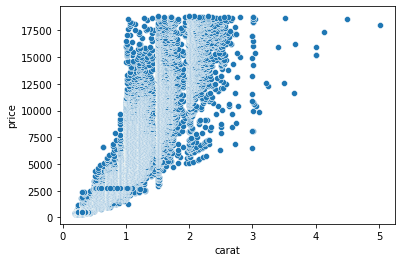

In [35]:

# Linear Relationship Check with ScaterPlot
sns.scatterplot(x='carat', y='price', data=df_dummy)

Text(0.5, 0, 'Residuals')

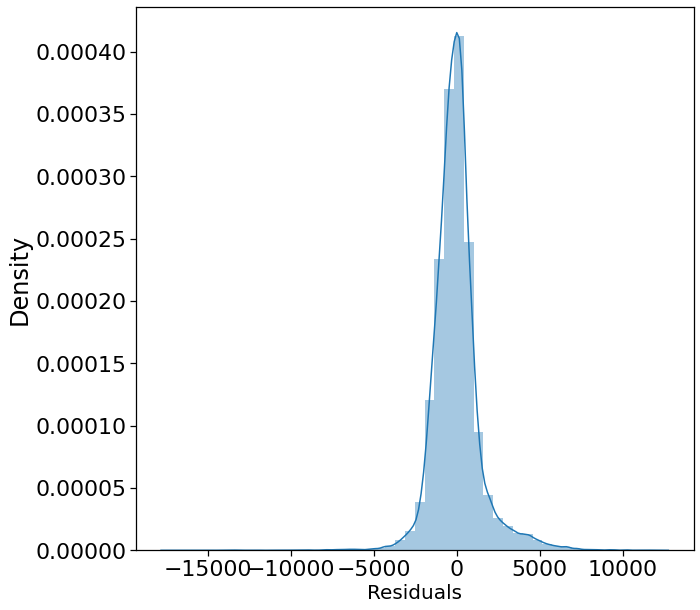

In [36]:
# Normality assumption with distplot

plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

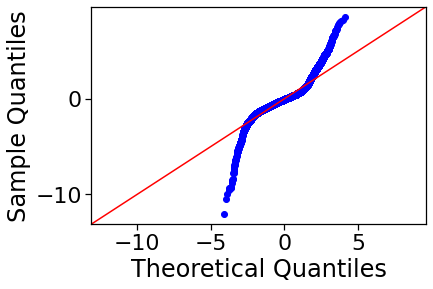

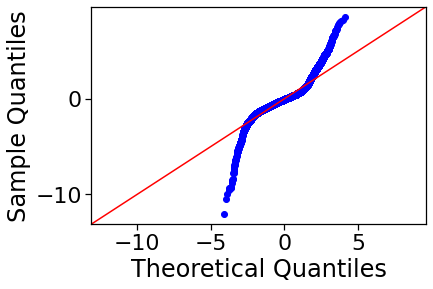

In [37]:
# Check with QQ plot
sm.qqplot(result.resid, line = '45', fit=True)

**Interpretation**

If the residual follows 45 degrees(red line), it means that the residual follows a normal distribution.

It is not recommended to use the normal test on a large dataset, because in a large dataset, the results of the normal test will not be reliable because the results will be concluded to be abnormal. So, it is better to use visualization

### **Check Gauss-Markov assumptions**

What you see is the error. With assumption:

* The mean error in the population is zero.
* The error is not correlated with other errors.
* The error has a homogeneous variance.

Text(0, 0.5, 'Residual')

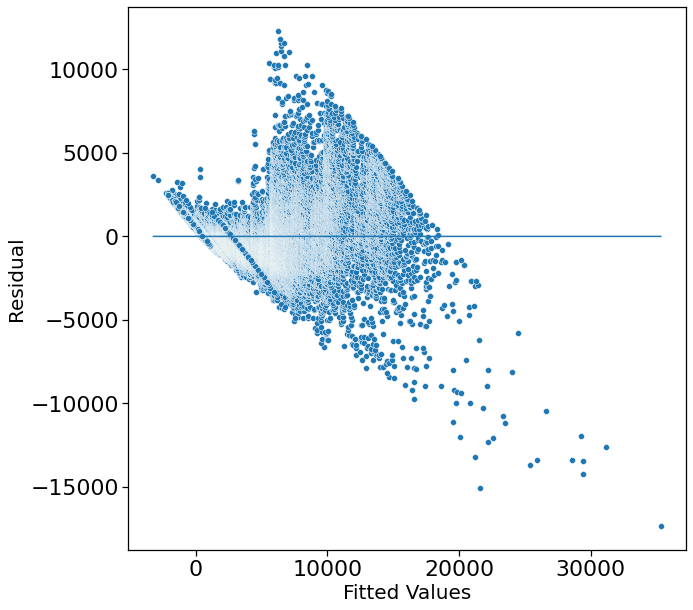

In [40]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20)

### **Conclusion**

1. If you look at the histogram, the residuals appear to be normally distributed. However, after being validated using a QQ-plot, it can be seen that the residual distribution does not follow the 45 degree line. This means, the assumption of normality is not met.
2. Residuals are not spread around 0. This means that the Gauss-Markov assumption is not fulfilled.
3. Based on the reference image, the residual plot is biased and homoscedastic.

In other words, although there is no multicollinearity (VIF value is met) and also adj. high r-squared, but we cannot be overly confident in the predictions given by the model. This is caused by the existence of several assumptions of the linear regression model that are not met, so that the output of the model is biased.